In [1]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt

## Declaire File Path ##

In [2]:
files = [
    '../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]
files2 = [
    '../proceed_data/proceed_data_v_10/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt',
]


files_vor = [
    '../proceed_data/proceed_data_v_given/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/150_vor_data.txt',
    
]

files2_vor = [
    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.txt',
]

## Plot All vorticity disstribution (No statsitic) ##

14680064


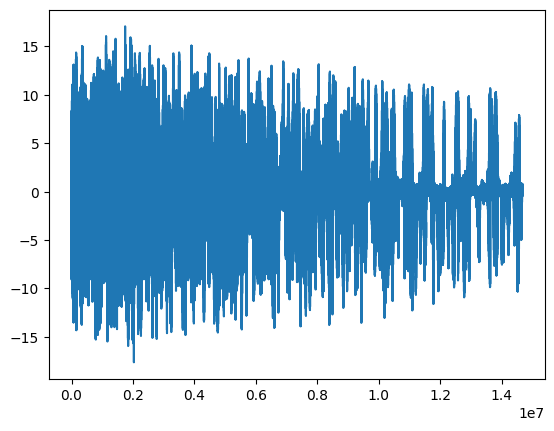

In [3]:
DataNum = len(files_vor)

all_data=[]

for file in files_vor:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

9437184


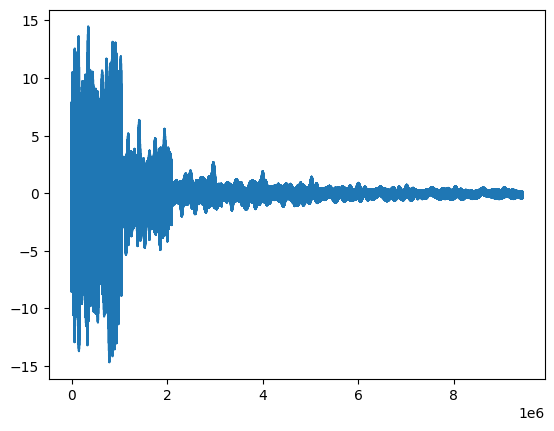

In [5]:
DataNum = len(files2_vor)

all_data=[]

for file in files2_vor:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

## Possibility distribution (Given 'v') ##

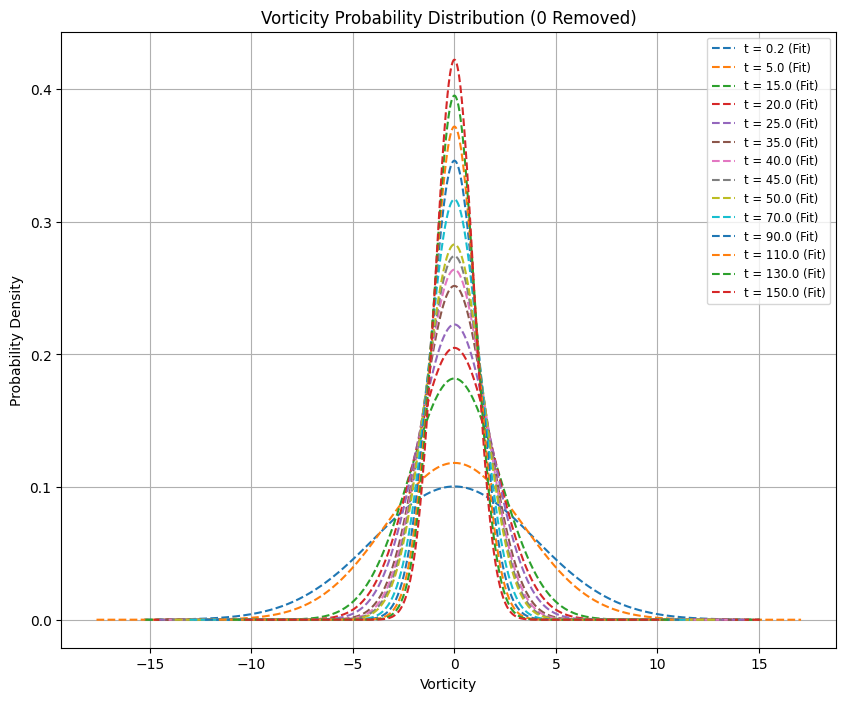

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.9709410611
t = 5.0     |   Sigma = 3.3749762930
t = 15.0    |   Sigma = 2.1938157761
t = 20.0    |   Sigma = 1.9465861269
t = 25.0    |   Sigma = 1.7922937559
t = 35.0    |   Sigma = 1.5852581278
t = 40.0    |   Sigma = 1.5117028696
t = 45.0    |   Sigma = 1.4552467723
t = 50.0    |   Sigma = 1.4100452688
t = 70.0    |   Sigma = 1.2591477608
t = 90.0    |   Sigma = 1.1529162891
t = 110.0   |   Sigma = 1.0731815640
t = 130.0   |   Sigma = 1.0097291717
t = 150.0   |   Sigma = 0.9450240680


[(0.2, 4.694277570393285e-09),
 (5.0, -2.9574459374515083e-10),
 (15.0, 6.348145550894024e-10),
 (20.0, -1.8184682865421409e-09),
 (25.0, -5.252685860053508e-10),
 (35.0, -6.482644885306976e-10),
 (40.0, -3.5014925315224495e-09),
 (45.0, 9.764354485554405e-10),
 (50.0, 4.935919772951561e-10),
 (70.0, 1.0359841077448723e-10),
 (90.0, 4.525005348719746e-10),
 (110.0, -1.6897977944208345e-10),
 (130.0, 3.121177300988154e-10),
 (150.0, -9.188797334244887e-10)]

In [25]:
from scipy.stats import norm
from scipy.stats import entropy

std_devs = []
mean_devs = []
entropies = []
time = []
sigma = []

plt.figure(figsize=(10, 8))

for file in files_vor:
    t = float(file.split('/')[-1].split('_')[0])

    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values  # NaN 제거

    data = data[data != 0]

    # histogram
    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")
    # 히스토그램 계산
    hist, bin_edges = np.histogram(data, bins=50, density=True)

    # 엔트로피 계산
    H = entropy(hist)
    time.append(t)
    
    entropies.append(H)
    mean, std = norm.fit(data)
    std_devs.append((t, std))
    sigma.append(std)
    mean_devs.append((t, mean))
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t} (Fit)")

plt.title("Vorticity Probability Distribution (0 Removed)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")
mean_devs

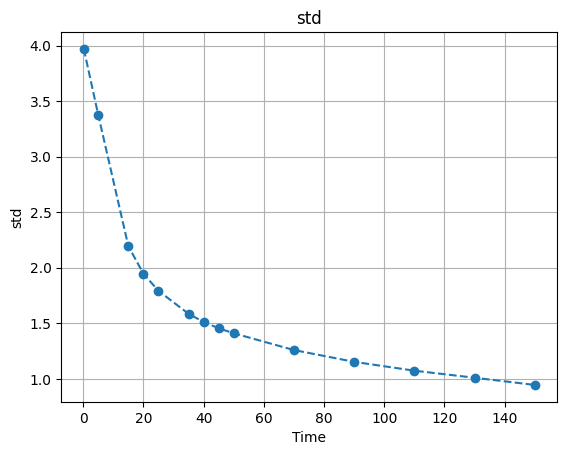

In [26]:
plt.plot(time, sigma, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

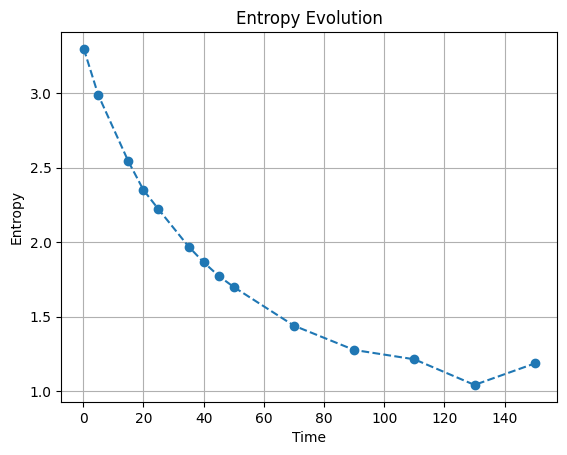

In [27]:
# 엔트로피 변화 시각화
plt.plot(time, entropies, marker='o', linestyle='--')
plt.title("Entropy Evolution")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## Possibility distribution (10 times 'v') ##

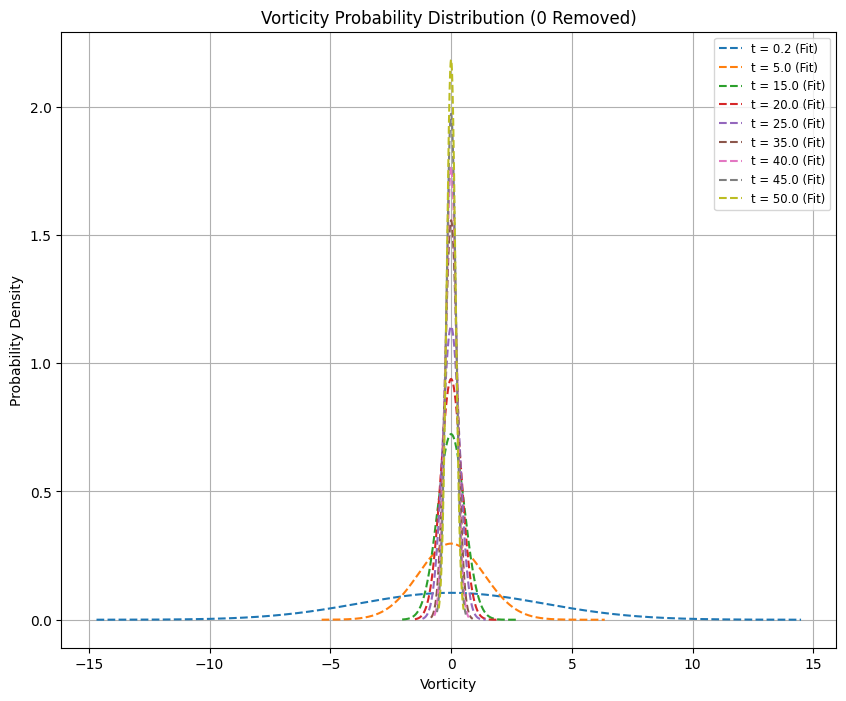

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.8035010122
t = 5.0     |   Sigma = 1.3441899424
t = 15.0    |   Sigma = 0.5512383245
t = 20.0    |   Sigma = 0.4251108222
t = 25.0    |   Sigma = 0.3490216433
t = 35.0    |   Sigma = 0.2562255941
t = 40.0    |   Sigma = 0.2259203371
t = 45.0    |   Sigma = 0.2022806959
t = 50.0    |   Sigma = 0.1827539059


[(0.2, -6.590814137941853e-10),
 (5.0, 1.2767980479312657e-09),
 (15.0, 1.7150695607627553e-09),
 (20.0, 2.2055780704403893e-10),
 (25.0, 1.0265637526239019e-10),
 (35.0, -1.4089415831947116e-11),
 (40.0, 3.4202736129418376e-11),
 (45.0, 1.1459263648660317e-10),
 (50.0, -6.207019165142824e-11)]

In [21]:
std_devs = []
mean_devs = []
entropies = []
time = []
sigma = []

plt.figure(figsize=(10, 8))

for file in files2_vor:
    t = float(file.split('/')[-1].split('_')[0])

    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values  # NaN 제거

    data = data[data != 0]

    # histogram
    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")
    # 히스토그램 계산
    hist, bin_edges = np.histogram(data, bins=50, density=True)

    # 엔트로피 계산
    H = entropy(hist)
    time.append(t)
    
    entropies.append(H)
    mean, std = norm.fit(data)
    std_devs.append((t, std))
    sigma.append(std)
    mean_devs.append((t, mean))
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t} (Fit)")

plt.title("Vorticity Probability Distribution (0 Removed)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")
mean_devs

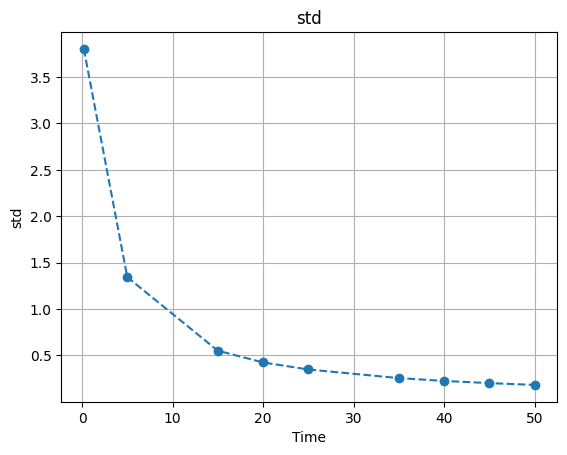

In [22]:
plt.plot(time, sigma, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

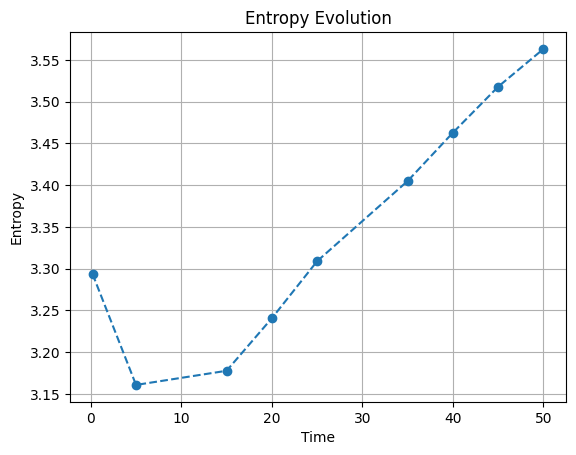

In [23]:
# 엔트로피 변화 시각화
plt.plot(time, entropies, marker='o', linestyle='--')
plt.title("Entropy Evolution")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()